In [607]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [608]:
loan_data = pd.read_csv("loan_old.csv")

In [609]:
# check whether there are missing values
loan_data.isnull()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64

In [610]:
# Features types
# categorical_features = loan_data.select_dtypes(include="object").drop(['Loan_Status', 'Loan_ID'], axis=1)
# numerical_features = loan_data.select_dtypes(include="number").drop(['Max_Loan_Amount'], axis=1)
categorical_features = [i for i in loan_data.columns if loan_data[i].dtype == 'O' and i not in ['Loan_Status', 'Loan_ID']]
numerical_features = [i for i in loan_data.columns if loan_data[i].dtype != 'O' and i != 'Max_Loan_Amount']
print(f"The categorical features are:\n{categorical_features}\n\n")
print(f"The numerical features are:\n{numerical_features}")

The categorical features are:
['Gender', 'Married', 'Dependents', 'Education', 'Property_Area']


The numerical features are:
['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History']


The numerical features are not on the same scale.


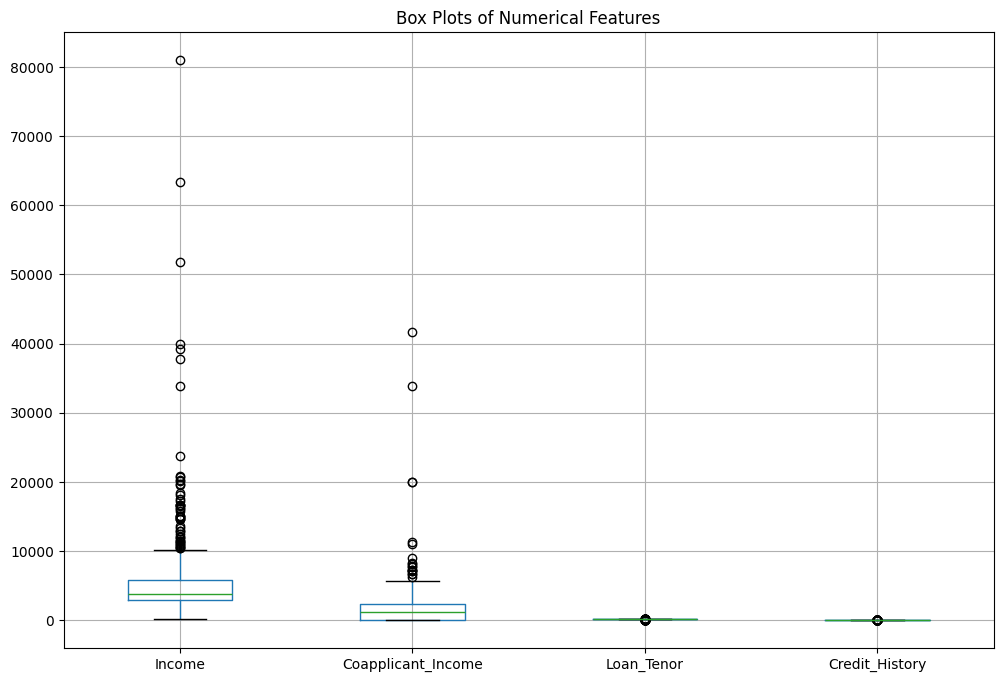

In [611]:
# checking the scale of each feature

stds = loan_data[numerical_features].std()

# Check whether the standard deviations of all the numerical features are similar
if stds.max() / stds.min() < 10:
    print('The numerical features are likely to be on the same scale.')
else:
    print('The numerical features are not on the same scale.')
    
#Visual Inspection    
loan_data[numerical_features].boxplot(figsize=(12, 8))
plt.title('Box Plots of Numerical Features')
plt.show()


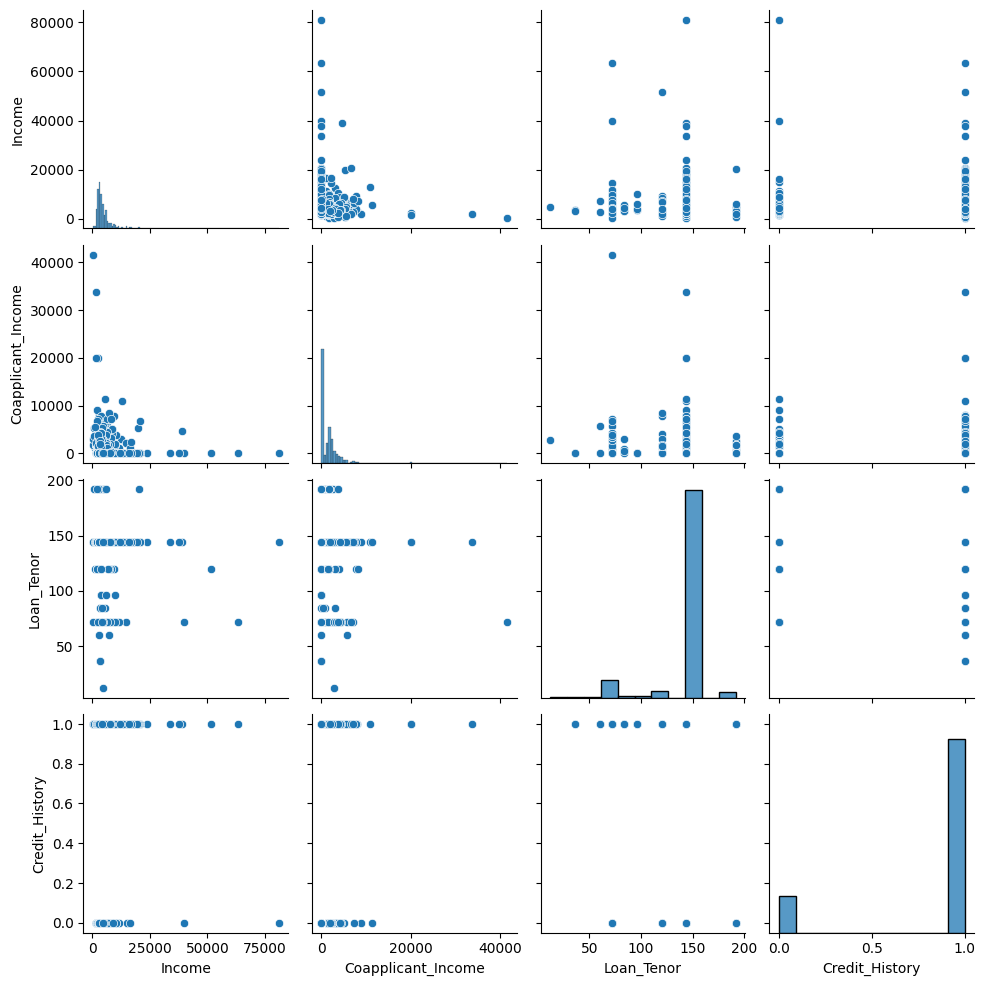

In [612]:
#visualize a pairplot between numercial columns
sns.pairplot(loan_data[numerical_features])
plt.show()

In [613]:
###Preprocess
#records containing missing values are removed
loan_data.dropna(inplace=True)
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Income                0
Coapplicant_Income    0
Loan_Tenor            0
Credit_History        0
Property_Area         0
Max_Loan_Amount       0
Loan_Status           0
dtype: int64

In [614]:
features = loan_data.drop(['Max_Loan_Amount', 'Loan_Status', 'Loan_ID'], axis=1)
loan_amount_target = loan_data['Max_Loan_Amount']
loan_status_target = loan_data['Loan_Status']
features.head()

Gender Married Dependents     Education  Income  Coapplicant_Income  \
1   Male     Yes          1      Graduate    4583              1508.0   
2   Male     Yes          0      Graduate    3000                 0.0   
3   Male     Yes          0  Not Graduate    2583              2358.0   
4   Male      No          0      Graduate    6000                 0.0   
5   Male     Yes          2      Graduate    5417              4196.0   

   Loan_Tenor  Credit_History Property_Area  
1       144.0             1.0         Rural  
2       144.0             1.0         Urban  
3       144.0             1.0         Urban  
4       144.0             1.0         Urban  
5       144.0             1.0         Urban

In [615]:
# the data is shuffled and split into training and testing sets
X_train, X_test, y_train1, y_test1, y_train2, y_test2 = train_test_split(
    features, loan_amount_target, loan_status_target, test_size=0.2, shuffle=True, random_state=0)

In [616]:
# categorical features are encoded
label_encoder = LabelEncoder()
for i in categorical_features:
    X_train[i] = label_encoder.fit_transform(X_train[i])
    X_test[i] = label_encoder.transform(X_test[i])

In [617]:
 # categorical target encoding
y_train2 = label_encoder.fit_transform(y_train2)
y_test2 = label_encoder.transform(y_test2)

In [618]:
# numerical features standardized
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features]) #use transform as we do not want to recalculate the mean and standard deviation of the numerical features (we want to use the mean and standard deviation that were calculated on the train set)

The numerical features are likely to be on the same scale.


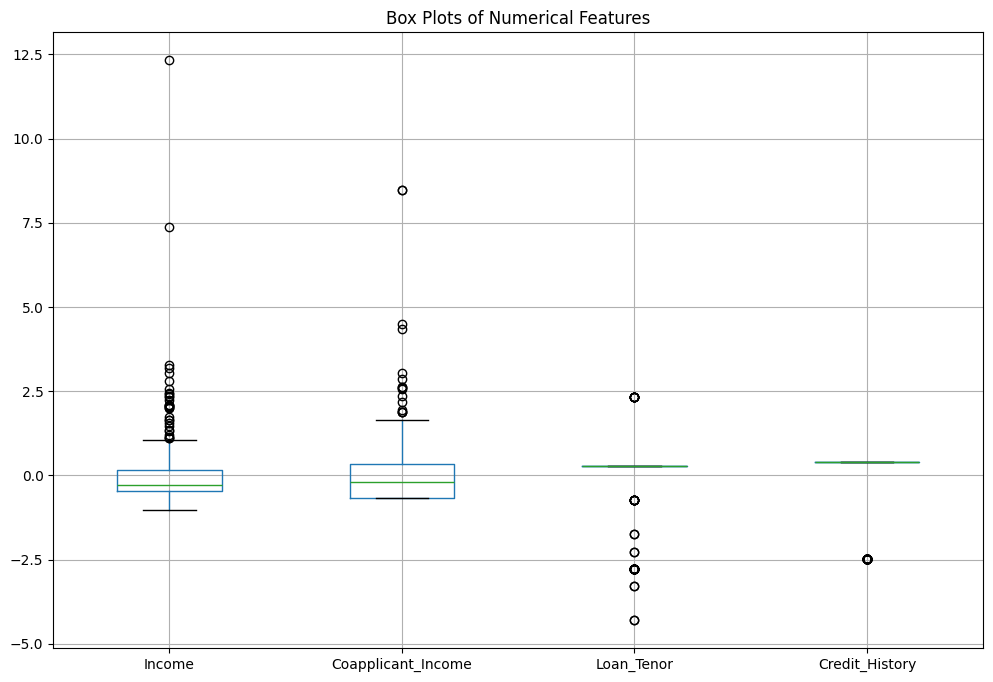

In [619]:
# checking the scale of each feature after numerical features are standardized

stdss = X_train[numerical_features].std()

# Check whether the standard deviations of all the numerical features are similar
if stdss.max() / stdss.min() < 10:
    print('The numerical features are likely to be on the same scale.')
else:
    print('The numerical features are not on the same scale.')
    
#Visual Inspection    
X_train[numerical_features].boxplot(figsize=(12, 8))
plt.title('Box Plots of Numerical Features')
plt.show()

In [620]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [621]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train1)

LinearRegression()

In [622]:
y_pred1 = linear_regression_model.predict(X_test)

In [623]:
formatted_y_pred1 = np.array([f"{value:.2f}" for value in y_pred1])
formatted_y_pred1

array(['134.43', '380.22', '218.45', '237.19', '165.78', '269.99',
       '253.83', '132.97', '381.18', '212.74', '244.44', '343.13',
       '195.55', '491.57', '228.78', '164.31', '199.55', '231.34',
       '359.04', '176.13', '240.77', '254.84', '199.80', '235.27',
       '212.80', '164.61', '193.06', '536.00', '225.01', '187.43',
       '366.93', '176.09', '372.54', '209.47', '236.25', '252.51',
       '263.54', '290.80', '335.68', '109.42', '140.64', '219.21',
       '193.96', '157.82', '164.23', '169.19', '169.59', '211.51',
       '273.51', '138.37', '207.15', '181.39', '121.39', '132.55',
       '327.61', '289.23', '159.09', '214.95', '488.09', '214.63',
       '92.58', '306.06', '226.10', '52.05', '235.39', '216.76', '110.59',
       '229.26', '198.82', '256.41', '190.83', '142.32', '3.48', '61.21',
       '174.80', '183.82', '245.58', '145.28', '148.31', '146.81',
       '514.98', '144.33', '226.31', '203.19', '255.17', '144.69',
       '193.37', '266.95', '177.82', '143.25', 

In [624]:
r2_score = r2_score(y_test1, y_pred1)

In [625]:
print(f"R2 score = {r2_score}")

R2 score = 0.7819160483175193


In [651]:
# Logistc regression 
w = np.zeros_like(X_train[0])
b = 0
alph = 0.1
iters = 1000

In [644]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [645]:
def logistic_regression_predict(x, w, b):
    m = x.shape[0]
    p = np.zeros(m)
    for i in range(m):
        z_wb = np.dot(x[i], w) + b
        f_wb = sigmoid(z_wb)
        p[i] = 1 if f_wb >= 0.5 else 0
    return p

In [646]:
def compute_gradient_descent(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        z_wb = np.dot(x[i], w) + b
        f_wb = sigmoid(z_wb)
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [647]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter):
    w = w_in
    b = b_in
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient_descent(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b

In [652]:
final_w, final_b = gradient_descent(X_train, y_train2, w, b, alph, iters)
y_pred2 = logistic_regression_predict(X_test, final_w, final_b)

In [649]:
def accuracy(y_true, y_pred):
    
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)

  accuracy = correct_predictions / total_predictions

  return accuracy

In [653]:
accuracy(y_test2, y_pred2)

0.7378640776699029

In [635]:
# Read and preprocess the new data
new_loan_data = pd.read_csv("loan_new.csv")

new_loan_data.dropna(inplace=True)

new_X_train = new_loan_data.drop(['Loan_ID'], axis=1)

for i in categorical_features:
    new_X_train[i] = label_encoder.fit_transform(new_X_train[i])

new_X_train[numerical_features] = scaler.transform(new_X_train[numerical_features])

In [636]:
new_X_train = new_X_train.to_numpy()
    
loan_amounts = linear_regression_model.predict(new_X_train)
status = logistic_regression_predict(new_X_train, final_w, final_b)

In [637]:
formatted_loan_amounts_pred = np.array([f"{value:.2f}" for value in loan_amounts])
formatted_loan_amounts_pred

array(['206.74', '190.24', '252.47', '121.85', '200.60', '104.04',
       '167.56', '310.89', '183.73', '117.20', '180.06', '383.93',
       '180.20', '206.48', '275.54', '194.42', '532.90', '51.27',
       '144.30', '-58.26', '126.14', '330.41', '797.89', '364.25',
       '48.10', '105.52', '254.42', '203.67', '214.35', '178.18',
       '143.66', '221.89', '203.91', '205.80', '209.78', '229.05',
       '142.78', '159.87', '312.48', '143.33', '167.65', '278.16',
       '179.95', '260.05', '49.52', '176.33', '121.87', '165.62',
       '124.96', '249.98', '51.22', '167.47', '248.10', '197.49',
       '166.13', '170.69', '255.76', '166.71', '154.85', '267.39',
       '295.28', '183.10', '41.04', '247.43', '282.15', '252.54',
       '214.30', '242.41', '287.21', '254.79', '200.48', '1900.55',
       '278.41', '298.80', '23.60', '296.52', '210.37', '147.99',
       '202.84', '201.79', '440.76', '264.41', '234.00', '259.11',
       '238.59', '277.89', '260.40', '321.80', '194.56', '221.56',


In [598]:
status

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1.